In [1]:
import numpy as np
from pylab import *
import copy

In [2]:
# r es el vector X,Y; 
def test_fn(r, a, b):
  return 0.5*(a*r[0]**2 + b*r[1]**2)

# esta funcion esta calculada a mano, haciendo la derivada
def grad(r, a, b):
  return [a*r[0], b*r[1]]

aa = 1.0
bb = 0.1
xx = np.linspace(-2*bb, 0.5, num=100)
yy = np.linspace(-bb, 1 + bb, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])

In [3]:
Nsteps = 30
step = (2.0/(1+np.sqrt(bb)))**2
beta = ((1-np.sqrt(bb))/(1+np.sqrt(bb)))**2
xk = np.zeros(Nsteps+1)
wk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
zk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = bb
yk[0] = 1.0

wk[0] = grad((xk[0], yk[0]), aa, bb)[0]
zk[0] = grad((xk[0], yk[0]), aa, bb)[1]

fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*wk[ii]
  yk[ii+1] = yk[ii] - step*zk[ii]

  wk[ii+1] = grad((xk[ii+1], yk[ii+1]), aa, bb)[0] + beta*wk[ii]
  zk[ii+1] = grad((xk[ii+1], yk[ii+1]), aa, bb)[1] + beta*zk[ii]

  fk[ii+1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)

x_mom = copy.copy(xk)
y_mom = copy.copy(yk)

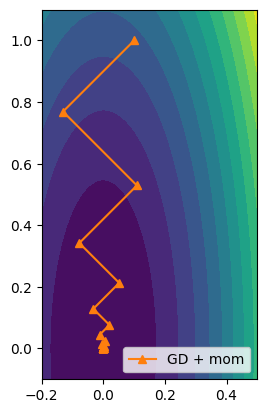

In [4]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(x_mom, y_mom, color='C1', marker='^', label='GD + mom')
legend()
gca().set_aspect('equal')

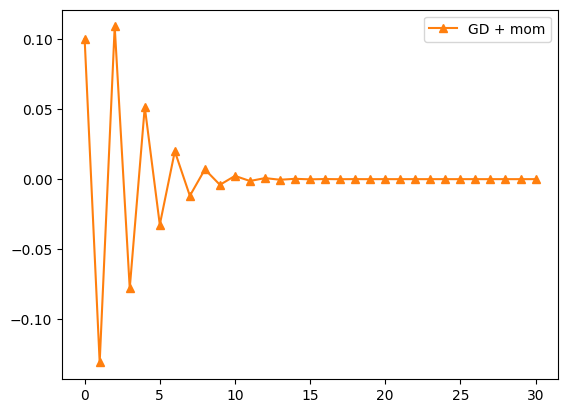

In [5]:
plot(x_mom, color='C1', marker='^', label='GD + mom')
legend()